<a href="https://colab.research.google.com/github/eyash24/Data-Science/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series
Following Krish Naik Time Series playlist:
https://youtube.com/playlist?list=PL-Pz4FzhSKySariBuJv8SD5VDbat0XNL_&si=fibUSJSa_1m61hKY

## Time Series EDA

In [1]:
# Installing Pandas Data Reader
! pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:

# pdr.get_data_yahoo('TSLA')

AttributeError: 'NoneType' object has no attribute 'group'

In [10]:
import yfinance as yf

company = 'TSLA'

# Define a start date and End Date
start = datetime(2017,2,27)
end =  datetime(2022,2,24)

# Read Stock Price Data
data = yf.download(company, start , end)

[*********************100%%**********************]  1 of 1 completed


In [11]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000
...,...,...,...,...,...,...
2022-02-16,304.683319,308.809998,300.403320,307.796661,307.796661,51294300
2022-02-17,304.420013,306.166656,291.366669,292.116669,292.116669,55178400
2022-02-18,295.333344,295.623322,279.203339,285.660004,285.660004,68501700


In [12]:
df_tesla = data

<Axes: xlabel='Date'>

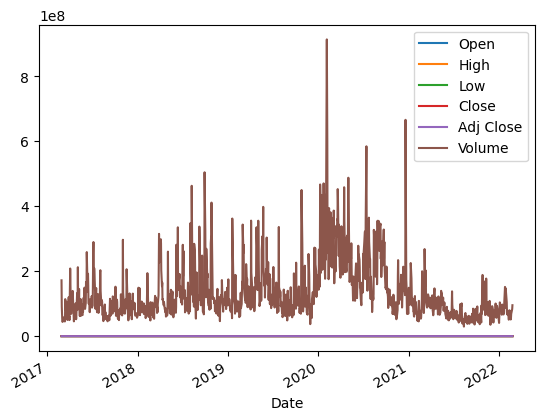

In [13]:
df_tesla.plot()

<Axes: xlabel='Date'>

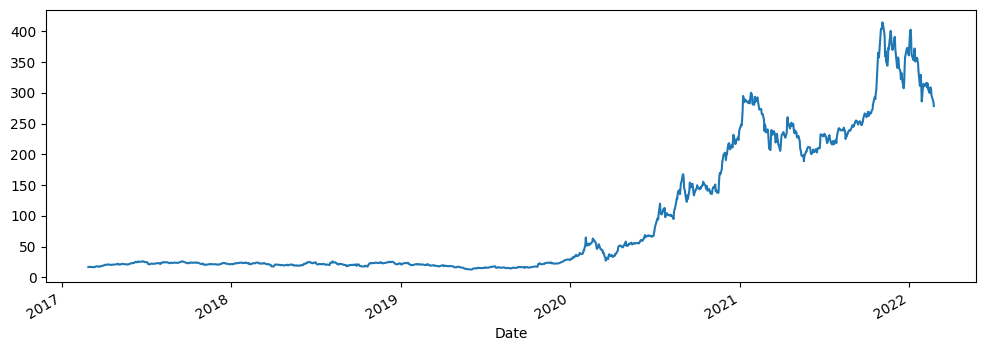

In [14]:
df_tesla['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

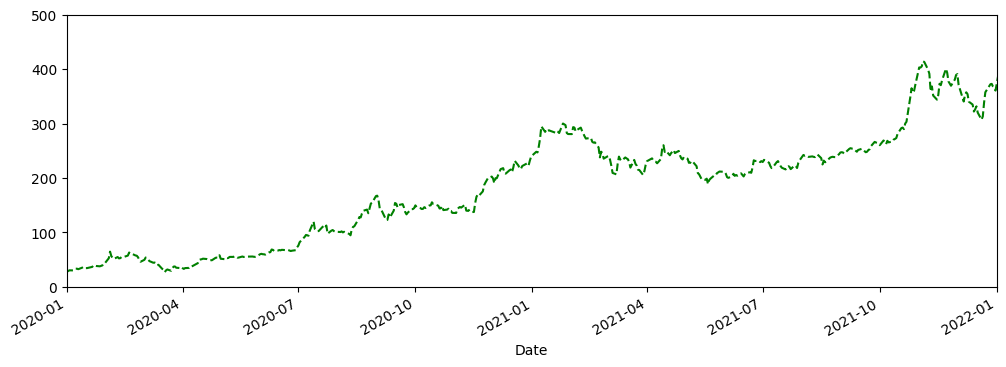

In [21]:
# setting x- and y-limit
df_tesla['High'].plot(
    xlim=['2020-01-01', '2022-01-01'],
    ylim=[0,500],
    figsize=(12,4),
    c='green',
    ls='--'
)

In [31]:
index = df_tesla.loc['2020-01-01':'2022-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2022-09-01']['Open']

In [32]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2022-02-16    304.683319
2022-02-17    304.420013
2022-02-18    295.333344
2022-02-22    278.043335
2022-02-23    276.809998
Name: Open, Length: 541, dtype: float64

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
index.shape, share_open.shape

((541,), (541,))

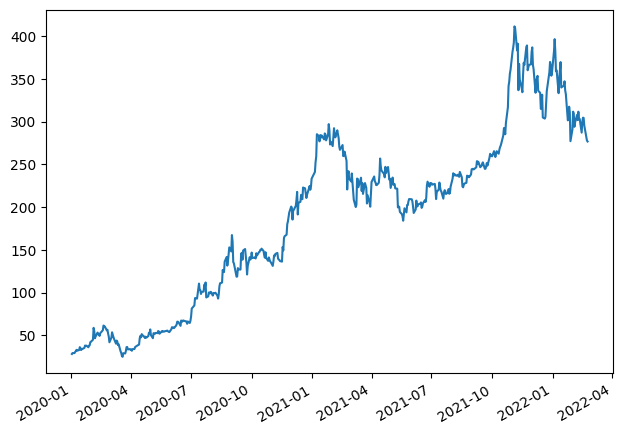

In [36]:
figure, axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open)

In [37]:
# Datetime Index
df_tesla = df_tesla.reset_index()

In [38]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [39]:
pd.to_datetime(df_tesla['Date'])

0      2017-02-27
1      2017-02-28
2      2017-03-01
3      2017-03-02
4      2017-03-03
          ...    
1253   2022-02-16
1254   2022-02-17
1255   2022-02-18
1256   2022-02-22
1257   2022-02-23
Name: Date, Length: 1258, dtype: datetime64[ns]

In [46]:
df_tesla.set_index('Date', drop=True, inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [47]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


In [48]:
datetime.now()

datetime.datetime(2024, 7, 8, 8, 37, 21, 890888)

### Time Resampling
Article for reference: https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

In [49]:
# rule = 'A' means year and frequency
df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,16.279333,16.433332,16.134001,16.246000,16.246000,43791000
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,187.666672,29401800
2022-12-31,276.809998,278.433319,253.520004,254.679993,254.679993,50729100


In [50]:
df_tesla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,151565700


<Axes: xlabel='Date'>

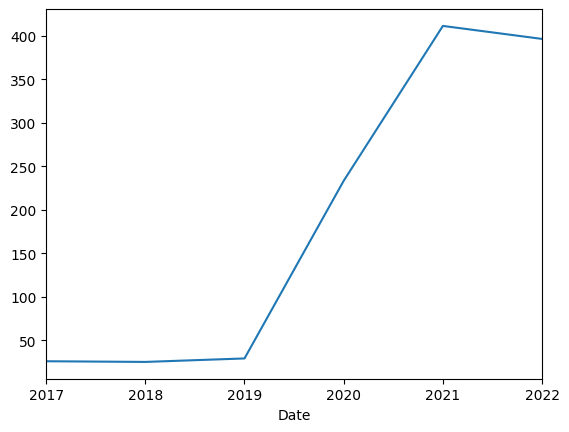

In [51]:
df_tesla.resample(rule='A').max()['Open'].plot()

In [52]:
# quaterly start frequency
df_tesla.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,18.582001,18.799999,18.480667,18.553333,18.553333,171912000
2017-04-01,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-01,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-01,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-01,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-01,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<Axes: xlabel='Date'>

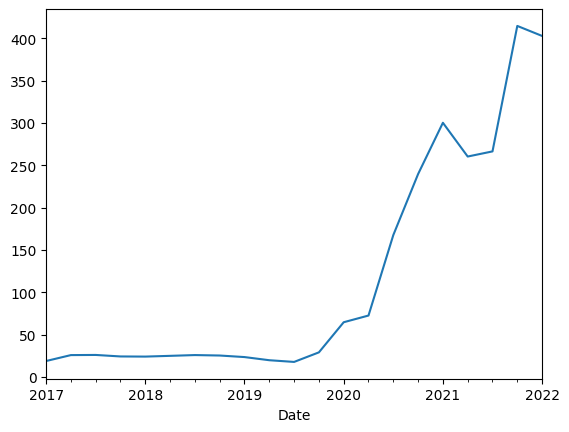

In [53]:
df_tesla.resample(rule='QS').max()['High'].plot()

In [54]:
# Business End Frequency
df_tesla.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-30,396.516663,402.666656,378.679993,399.926666,399.926666,151565700


In [55]:
df_tesla.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.582001,18.799999,18.480667,18.553333,18.553333,171912000
2017-04-03,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-03,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-02,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-02,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-02,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<Axes: xlabel='Date'>

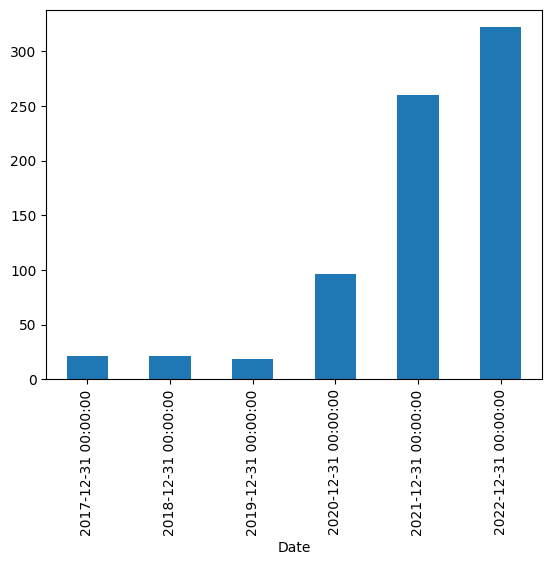

In [57]:
# plotting
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

<Axes: xlabel='Date'>

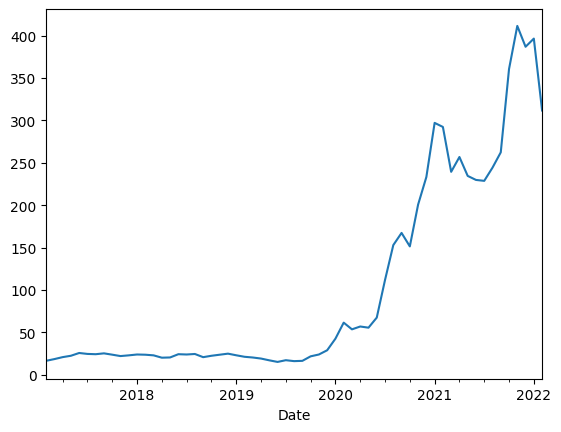

In [58]:
df_tesla['Open'].resample(rule='M').max().plot()

In [62]:
df_tesla['High'].rolling(10).mean().head(20)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10    16.734733
2017-03-13    16.724667
2017-03-14    16.772133
2017-03-15    16.813133
2017-03-16    16.896267
2017-03-17    16.985800
2017-03-20    17.071467
2017-03-21    17.144200
2017-03-22    17.177534
2017-03-23    17.237600
2017-03-24    17.353534
Name: High, dtype: float64

In [63]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(30).mean()

In [65]:
df_tesla['Open:30 days rolling'].head(50)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10          NaN
2017-03-13          NaN
2017-03-14          NaN
2017-03-15          NaN
2017-03-16          NaN
2017-03-17          NaN
2017-03-20          NaN
2017-03-21          NaN
2017-03-22          NaN
2017-03-23          NaN
2017-03-24          NaN
2017-03-27          NaN
2017-03-28          NaN
2017-03-29          NaN
2017-03-30          NaN
2017-03-31          NaN
2017-04-03          NaN
2017-04-04          NaN
2017-04-05          NaN
2017-04-06          NaN
2017-04-07    17.557800
2017-04-10    17.693311
2017-04-11    17.847067
2017-04-12    17.962978
2017-04-13    18.067400
2017-04-17    18.182867
2017-04-18    18.297956
2017-04-19    18.410267
2017-04-20    18.542511
2017-04-21    18.663333
2017-04-24    18.803356
2017-04-25    18.943756
2017-04-26 

<Axes: xlabel='Date'>

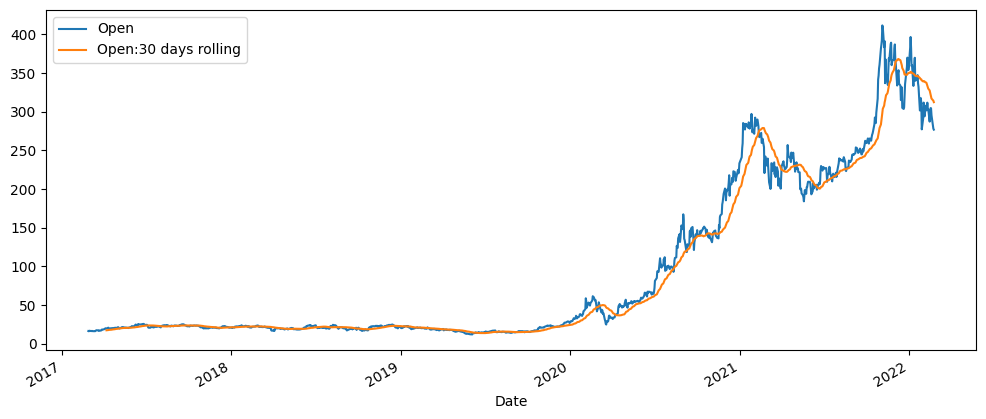

In [66]:
df_tesla[['Open', 'Open:30 days rolling']].plot(figsize=(12,5))

*Assignment*
<br>
1. Read the Microsoft Data using Panda Datareader
2. Get maximum price of the share from 2017-2022
3. Which is the date of the highest price of the stock
4. Which is the date of the lowest price of stock